<a href="https://colab.research.google.com/github/EnzoGui18/ANALISE-PRF/blob/main/ANALISE_PRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel('BD-PRF-SUDESTE.xlsx')
df.head()

,id,data,hora,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,262002,2020-01-10,21:40:00,SP,116.0,6.0,QUELUZ,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,...,2,0,1,0,1,0,1,2,-22.531582,-44.753747
1,264173,2020-01-21,08:05:00,SP,116.0,158.8,JACAREI,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,...,2,0,1,0,1,0,1,2,-23.260721,-45.951792
2,270555,2020-02-20,21:40:00,SP,116.0,189.7,SANTA ISABEL,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,...,2,0,1,0,1,0,1,2,-23.366930,-46.230812
3,271883,2020-02-26,17:10:00,SP,116.0,57.2,GUARATINGUETA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,...,2,0,1,0,1,0,1,2,-22.774546,-45.138071
4,274215,2020-03-09,06:50:00,SP,116.0,226.0,GUARULHOS,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,...,2,0,1,0,1,0,1,2,-23.492329,-46.551282


In [ ]:
#Transformando coluna data para Datetime
df['data'] = pd.to_datetime(df['data'])

In [ ]:
#Criando Colunas Calculadas
df['dia_semana'] = df['data'].dt.day_name()
df['mes'] = df['data'].dt.month
df['ano'] = df['data'].dt.year

In [ ]:
#Analise de Agrupamento

#Total de Acidentes por Estado:
total_eventos_estado = df['uf'].value_counts()

#Total de Acidentes por Horario:
total_eventos_horario = df['hora'].value_counts().sort_index()

#Total de Acidentes por Dia da Semana:
total_eventos_dia_semana = df['dia_semana'].value_counts()

#Top7 Causas de Acidentes:
top_7_causas_acidentes = df['causa_acidente'].value_counts().head(7)

#Acidentes com mais de 3 Obitos:
acidentes_mais_3_mortos = df[df['mortos'] > 3].shape[0]



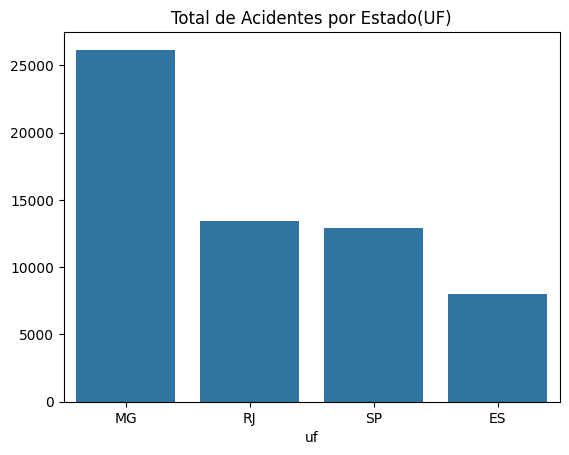

In [ ]:
#Visualização

import seaborn as sns
import matplotlib.pyplot as plt

#Acidentes Por Estado
sns.barplot(x=total_eventos_estado.index, y=total_eventos_estado.values)
plt.title("Total de Acidentes por Estado(UF)")
plt.show()

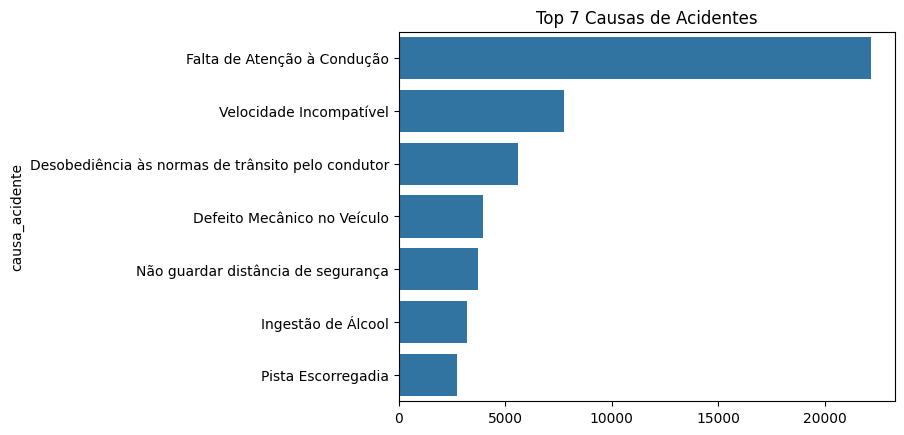

In [ ]:
#Top7 Causas de Acidentes:

sns.barplot(x=top_7_causas_acidentes.values, y=top_7_causas_acidentes.index)
plt.title("Top 7 Causas de Acidentes")
plt.show()


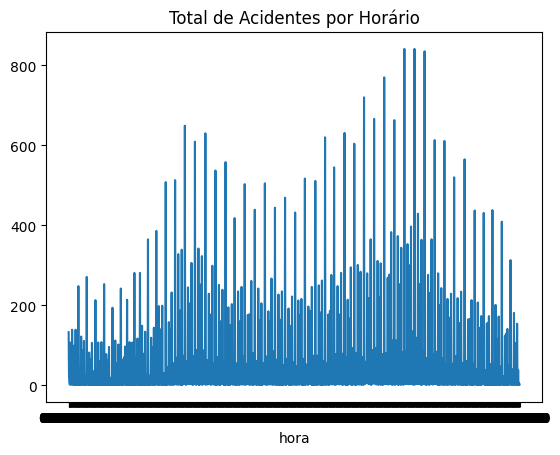

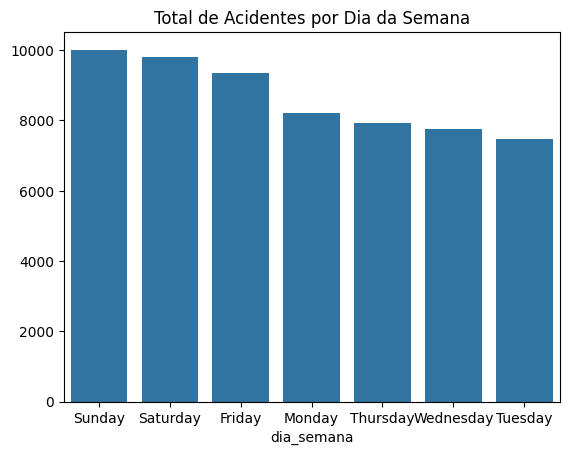

In [ ]:
#Acidentes por Horario e Dia da semana
sns.lineplot(x=total_eventos_horario.index.astype(str), y=total_eventos_horario.values)
plt.title("Total de Acidentes por Horário")
plt.show()

sns.barplot(x=total_eventos_dia_semana.index, y=total_eventos_dia_semana.values)
plt.title("Total de Acidentes por Dia da Semana")
plt.show()

In [ ]:
#Criando Um Mapa Interativo
import folium

#Centralização
mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Adicionar marcadores para cada acidente
for _, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['municipio']).add_to(mapa)

# Salvar o mapa em um arquivo HTML
mapa.save('acidentes_map.html')